In [1]:
import gensim
import json
import re
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import pyLDAvis.gensim 

morph = MorphAnalyzer()

In [2]:
from tqdm import tqdm_notebook as tqdm
from collections import Counter

In [3]:
import numpy as np

## Домашнее задание

## Подготовка

In [4]:
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)

def clean(words):
    clean = [morph.parse(word)[0].normal_form for word in words if len(set(word)) > 1]
    return clean

In [5]:
texts = open('habr_texts.txt').read().splitlines()

In [6]:
texts = [clean(word_tokenize(text.lower())) for text in tqdm(texts)]

HBox(children=(IntProgress(value=0, max=4121), HTML(value='')))

In [7]:
# для нграммов
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.4) # threshold можно подбирать
p = gensim.models.phrases.Phraser(ph)
ngrammed_texts = p[texts]

## Тематическое моделирование в gensim

## Попытка 1

In [8]:
dictionary = gensim.corpora.Dictionary(texts)

In [9]:
dictionary.filter_extremes(no_above=0.3, no_below=30)
dictionary.compactify()

In [10]:
print(dictionary)

Dictionary(7648 unique tokens: ['.net', '2-х', '3.0', 'address', 'api']...)


In [11]:
corpus = [dictionary.doc2bow(text) for text in texts]


#### Следующую ячейку я закомменчу, а то она печатает длиннющую простыню каких-то предупреждений.

In [58]:

#lda_1 = gensim.models.LdaModel(corpus, 200, id2word=dictionary, passes=5)

In [12]:
#lda_1.print_topics()

#### Вообще это не очень вдохновляет. Ну вот что-то понятное:

In [14]:
lda_1.print_topic(96, topn=15)

'0.195*"печать" + 0.098*"принтер" + 0.083*"лист" + 0.059*"печатать" + 0.037*"бумага" + 0.029*"напечатать" + 0.027*"изготовление" + 0.024*"бумажный" + 0.021*"материал" + 0.021*"слой" + 0.019*"печатный" + 0.017*"деньга" + 0.015*"велосипед" + 0.014*"форма" + 0.010*"станок"'

In [15]:
lda_1.print_topic(76, topn=15)

'0.135*"пакет" + 0.036*"install" + 0.036*"sudo" + 0.032*"установка" + 0.026*"online" + 0.020*"apt-get" + 0.020*"clone" + 0.018*"настройка" + 0.018*"репозиторий" + 0.017*"make" + 0.017*"git" + 0.017*"ubuntu" + 0.016*"cd" + 0.015*"commit" + 0.015*"resources"'

In [16]:
lda_1.print_topic(20, topn=15)

'0.028*"сайт" + 0.012*"реклама" + 0.011*"страница" + 0.009*"рекламный" + 0.009*"ссылка" + 0.009*"сеть" + 0.008*"трафик" + 0.008*"партнёр" + 0.007*"партнерский" + 0.007*"клиент" + 0.006*"продажа" + 0.006*"канал" + 0.006*"контент" + 0.005*"посетитель" + 0.005*"google"'

#### Coherence

In [23]:
coherence_model_lda_1 = gensim.models.CoherenceModel(model=lda_1, 
                                                   texts=texts, 
                                                   dictionary=dictionary, coherence='c_v')

In [24]:
coherence_model_lda_1.get_coherence()

0.43868283127823665

In [25]:
topics = []
for topic_id, topic in lda_1.show_topics(num_topics=100, formatted=False):
    topic = [word for word, _ in topic]
    topics.append(topic)

In [27]:
coherence_model_lda_11 = gensim.models.CoherenceModel(topics=topics, 
                                                   texts=texts, 
                                                   dictionary=dictionary, coherence='c_v')

In [28]:
coherence_model_lda_11.get_coherence()

0.5145657231248567

## Попытка 2. Немножко поменяем словарь

In [39]:
dictinary = gensim.corpora.Dictionary(texts)

In [40]:
dictinary.filter_extremes(no_above=0.2, no_below=30)
dictinary.compactify()

In [41]:
print(dictinary)

Dictionary(7451 unique tokens: ['.net', '2-х', '3.0', 'address', 'api']...)


In [32]:
corpus = [dictinary.doc2bow(text) for text in texts]

In [59]:
#lda_2 = gensim.models.LdaModel(corpus, 200, id2word=dictinary, passes=5)

In [13]:
#lda_2.print_topics()

In [35]:
lda_2.print_topic(47, topn=15)

'0.065*"клетка" + 0.031*"ген" + 0.019*"женщина" + 0.016*"тело" + 0.015*"деление" + 0.015*"молекула" + 0.014*"образование" + 0.012*"мужчина" + 0.011*"генетический" + 0.010*"мутация" + 0.010*"материал" + 0.009*"жить" + 0.008*"существо" + 0.008*"организм" + 0.008*"днк"'

In [36]:
lda_2.print_topic(176, topn=15)

'0.156*"пациент" + 0.065*"бактерия" + 0.064*"вирус" + 0.063*"лечение" + 0.060*"заболевание" + 0.056*"лекарство" + 0.043*"терапия" + 0.040*"геном" + 0.039*"доктор" + 0.033*"клинический" + 0.032*"препарат" + 0.031*"днк" + 0.018*"организм" + 0.017*"борьба" + 0.016*"диагностировать"'

In [37]:
lda_2.print_topic(8, topn=15)

'0.096*"безопасность" + 0.055*"router" + 0.049*"защита" + 0.036*"изоляция" + 0.034*"антивирусный" + 0.030*"отпечаток" + 0.029*"безопасный" + 0.026*"контролировать" + 0.023*"включая" + 0.022*"protection" + 0.021*"security" + 0.021*"защищать" + 0.020*"amp" + 0.020*"палец" + 0.020*"включать"'

In [38]:
lda_2.print_topic(57, topn=15)

'0.012*"скачать" + 0.009*"запрос" + 0.008*"протокол" + 0.008*"поисковый" + 0.007*"архив" + 0.007*"популярный" + 0.007*"скачивание" + 0.007*"релиз" + 0.006*"product" + 0.005*"фото" + 0.005*"искать" + 0.005*"добавлять" + 0.005*"удалять" + 0.004*"выбирать" + 0.004*"скачивать"'

In [39]:
lda_2.print_topic(72, topn=15)

'0.583*"рейтинг" + 0.162*"кредит" + 0.071*"формула" + 0.048*"кредитный" + 0.017*"величина" + 0.006*"лимит" + 0.006*"блокирование" + 0.004*"выручка" + 0.004*"снег" + 0.004*"сделка" + 0.004*"деньга" + 0.003*"выделяться" + 0.003*"субъект" + 0.002*"зарплата" + 0.002*"норма"'

In [41]:
cm_2 = gensim.models.CoherenceModel(model=lda_2, 
                                    texts=texts, 
                                    dictionary=dictinary, coherence='c_v')

In [42]:
cm_2.get_coherence()

0.46528387144159844

## Попытка 3. Увеличим количество проходов: passes = 10

In [60]:
#lda_3 = gensim.models.LdaModel(corpus, 200, id2word=dictinary, passes=10)

In [14]:
#lda_3.print_topics()

#### Вот вроде около дела:

In [48]:
lda_3.print_topic(185, topn=15)

'0.096*"кожа" + 0.046*"человеческий" + 0.034*"учёный" + 0.029*"научный" + 0.024*"журнал" + 0.023*"орган" + 0.022*"образец" + 0.021*"разработать" + 0.020*"материал" + 0.020*"кровь" + 0.018*"предшественник" + 0.018*"опубликовать" + 0.017*"подходящий" + 0.016*"2016" + 0.016*"живой"'

In [49]:
lda_3.print_topic(45, topn=15)

'0.108*"репозиторий" + 0.079*"коммит" + 0.074*"git" + 0.053*"ветка" + 0.039*"github" + 0.024*"commit" + 0.023*"configuration" + 0.022*"link" + 0.019*"релиз" + 0.018*"сборка" + 0.017*"flow" + 0.017*"repository" + 0.016*"origin" + 0.015*"master" + 0.014*"конфигурация"'

In [50]:
lda_3.print_topic(42, topn=15)

'0.145*"игра" + 0.059*"игрок" + 0.023*"играть" + 0.023*"игровой" + 0.012*"исследование" + 0.011*"удача" + 0.007*"аудитория" + 0.007*"жанр" + 0.006*"дизайнер" + 0.006*"шанс" + 0.005*"случайный" + 0.005*"персонаж" + 0.005*"движок" + 0.004*"карта" + 0.004*"геймплей"'

#### Coherence:

In [53]:
cm_3 = gensim.models.CoherenceModel(model=lda_3, 
                                    texts=texts, 
                                    dictionary=dictinary, coherence='c_v')

In [54]:
cm_3.get_coherence()

0.47719632137565043

## Попытка 4. Увеличим количество тем до 300

In [61]:
#lda_4 = gensim.models.LdaModel(corpus, 300, id2word=dictionary, passes=5)

In [15]:
#lda_4.print_topics()

#### Как-то вообще ничего хорошего не видно.

In [60]:
cm_4 = gensim.models.CoherenceModel(model=lda_4, 
                                    texts=texts, 
                                    dictionary=dictionary, coherence='c_v')

In [61]:
cm_4.get_coherence()

0.4361736468211802

## Попытка 5. Психанула и убрала из текстов латинские буквы

In [16]:
def only_cyrillic(text):
    return re.sub(r'[A-Za-z]', '', text)

In [17]:
t = open('habr_texts.txt').read().splitlines()
new_texts = [only_cyrillic(text) for text in t]
#texts = [clean(text.lower()) for text in tqdm(texts)]
#texts = [clean(word_tokenize(text.lower())) for text in tqdm(t)]

In [18]:
new_texts = [clean(word_tokenize(text.lower())) for text in tqdm(new_texts)]


HBox(children=(IntProgress(value=0, max=4121), HTML(value='')))

In [19]:
new_dict = gensim.corpora.Dictionary(new_texts)

In [20]:
new_dict.filter_extremes(no_above=0.3, no_below=30)
new_dict.compactify()

In [21]:
print(new_dict)

Dictionary(6718 unique tokens: ['.заключение', '2-х', '3.0', '30', '_.']...)


In [22]:
new_corpus = [new_dict.doc2bow(text) for text in texts]

In [62]:
#lda_5 = gensim.models.LdaModel(new_corpus, 200, id2word=new_dict, passes=5)

In [53]:
#lda_5.print_topics()

#### Кажется, неплохо:

In [28]:
lda_5.print_topic(43, topn=10)

'0.071*"безопасность" + 0.050*"защита" + 0.040*"информационный" + 0.026*"атака" + 0.024*"доступ" + 0.018*"организация" + 0.018*"утечка" + 0.014*"шифрование" + 0.014*"обеспечение" + 0.013*"инфраструктура"'

In [29]:
lda_5.print_topic(136, topn=10)

'0.130*"канал" + 0.104*"трафик" + 0.095*"связь" + 0.064*"оператор" + 0.057*"интернет" + 0.051*"передача" + 0.050*"кабель" + 0.043*"скорость" + 0.032*"обмен" + 0.031*"сеть"'

In [30]:
lda_5.print_topic(95, topn=10)

'0.080*"экзамен" + 0.067*"сдача" + 0.065*"курс" + 0.063*"домашний" + 0.046*"ведение" + 0.045*"подготовка" + 0.033*"отклик" + 0.032*"шкала" + 0.031*"сервис" + 0.027*"материал"'

In [31]:
lda_5.print_topic(131, topn=10)

'0.073*"астероид" + 0.055*"земля" + 0.038*"луна" + 0.037*"объект" + 0.033*"орбита" + 0.027*"тело" + 0.023*"расстояние" + 0.020*"пояс" + 0.019*"столкновение" + 0.017*"размер"'

In [32]:
lda_5.print_topic(153, topn=10)

'0.411*"герой" + 0.194*"википедия" + 0.077*"запретить" + 0.053*"заблокировать" + 0.041*"отменить" + 0.034*"вооружённый" + 0.020*"якобы" + 0.014*"блокировка" + 0.013*"реестр" + 0.010*"тактика"'

In [33]:
lda_5.print_topic(71, topn=10)

'0.071*"корея" + 0.045*"южный" + 0.034*"поезд" + 0.030*"страна" + 0.022*"корейский" + 0.018*"технология" + 0.016*"интернет" + 0.013*"рекорд" + 0.010*"высокий" + 0.010*"транспорт"'

In [34]:
lda_5.print_topic(83, topn=10)

'0.000*"класс" + 0.000*"метод" + 0.000*"элемент" + 0.000*"библиотека" + 0.000*"объект" + 0.000*"список" + 0.000*"про" + 0.000*"сообщение" + 0.000*"защита" + 0.000*"страница"'

In [35]:
lda_5.print_topic(35, topn=10)

'0.043*"перевод" + 0.029*"электроника" + 0.019*"материал" + 0.016*"переводчик" + 0.016*"локализация" + 0.015*"язык" + 0.015*"тема" + 0.014*"английский" + 0.013*"перевести" + 0.010*"литература"'

In [26]:
cm_5 = gensim.models.CoherenceModel(model=lda_5, 
                                    texts=new_texts, 
                                    dictionary=new_dict, coherence='c_v')

In [27]:
cm_5.get_coherence()

0.41239157364531265

## Разложение матриц в sklearn

In [45]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [46]:
stexts = [' '.join(text) for text in texts]

In [47]:
vectorizer = TfidfVectorizer(max_features=25000, min_df=5, max_df=0.3, lowercase=False)
X = vectorizer.fit_transform(stexts)

In [48]:
model = NMF(n_components=30)

In [49]:
model.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=30, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [50]:
def get_nmf_topics(model, n_top_words):
    
    #id слов.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(30):
        
        #топ n слов для темы.
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [51]:
get_nmf_topics(model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 21,Topic # 22,Topic # 23,Topic # 24,Topic # 25,Topic # 26,Topic # 27,Topic # 28,Topic # 29,Topic # 30
0,ты,gt,игра,космический,звук,сеть,камера,js,рынок,файл,...,язык,сайт,public,дата,бот,книга,объект,товар,if,vr
1,продукт,lt,игрок,спутник,сигнал,трафик,устройство,react,российский,php,...,обучение,страница,string,центр,telegram,часы,значение,скидка,int,виртуальный
2,клиент,div,игровой,орбита,наушник,связь,смартфон,css,страна,docker,...,программирование,реклама,void,сервер,сообщение,каковать,элемент,магазин,amp,реальность
3,сотрудник,class,играть,ракета,усилитель,оператор,датчик,javascript,бизнес,сервер,...,робот,браузер,new,инфраструктура,чат,порекомендовать,метод,цена,lt,oculus
4,бизнес,name,персонаж,марс,частота,ip,аккумулятор,angular,россия,http,...,нейросеть,контент,this,облачный,телеграм,профессиональный,блок,распродажа,return,шлем
5,программист,this,steam,аппарат,звуковой,интернет,телефон,веб,рубль,sudo,...,лекция,google,return,облако,bot,каким,строка,покупатель,else,vive
6,надо,props,unity,земля,музыка,dpi,видео,vue,налог,nginx,...,курс,домен,private,услуга,api,предпочитать,класс,пятница,null,htc
7,менеджер,return,геймплей,луна,искажение,канал,робот,браузер,доход,скрипт,...,программа,рекламный,var,оборудование,мессенджер,бумажный,алгоритм,покупка,char,unreal
8,да,html,жанр,наса,акустический,сетевой,корпус,компонент,закон,etc,...,ребёнок,клиент,class,клиент,канал,слушать,файл,чёрный,void,дополнить
9,опыт,value,инди,полёт,звучание,устройство,экран,dom,деньга,usr,...,машинный,com,класс,цод,message,путь,точка,продажа,std,машина


#### Лучше всех среди LDA, наверное, были модели 3 и 5. Темы здесь тоже неплохие. А ещё у меня в какой-то момент была отличная тема про Илона Маска, но та модель потерялась. И про Убер была хорошая тема.

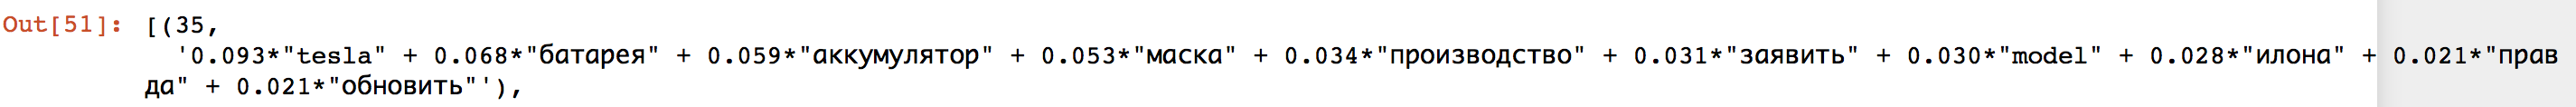

In [55]:
from IPython.display import Image

Image(filename='tesla.png') 

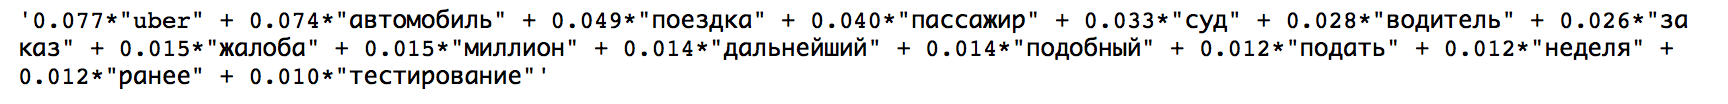

In [56]:
Image(filename='uber.png') 